# 0. 패키지 불러오기 

In [74]:
#패키지 불러오기 
import pandas as pd 

#데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

#데이터 scaling
from sklearn.preprocessing import StandardScaler

#데이터 분할;train,test
from sklearn.model_selection import train_test_split

#분류SVM
from sklearn.svm import SVC

#최적 모델, 파라미터 검색
from sklearn.model_selection import GridSearchCV

#모델 성능 평가
from sklearn.metrics import confusion_matrix

# 1. 데이터 구성 

### 1-1 데이터 구성하기

In [75]:
#데이터 구성하기
df_raw=pd.read_csv("/home/piai/Downloads/3/유방암.csv", engine='python')
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 1-2 결측치 처리

In [76]:
#데이터 타입 확인하기 
df_raw.dtypes

diagnosis                    int64
mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points

In [77]:
#결측지 확인
df_raw.isnull().sum(axis=0)

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

### 1-3  더미변수 생성 

In [78]:
#get_dummies: 데이터의 문자형 변수에 대한 더미 변수 생성
df_raw_dummy=pd.get_dummies(df_raw)

#더미변수 생성된 데이터의 상위 5개 row확인
df_raw_dummy.head()

#변수 설정 

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 1-4 설명변수, 목표변수 지정 

In [79]:
# 설명변수, 목표변수 데이터 지정 
df_raw_x=df_raw_dummy.drop("diagnosis", axis=1, inplace=False)
df_raw_y=df_raw_dummy["diagnosis"]

### 1-5 데이터 분할 

In [80]:
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
df_train_x,df_val_x,df_train_y,df_val_y=train_test_split(df_train_x,df_train_y,test_size=3/7,random_state=1234)
print('train data X size:{}'.format(df_train_x.shape))
print('train data Y size:{}'.format(df_train_y.shape))
print('validation data X size:{}'.format(df_val_x.shape))
print('validation data Y size:{}'.format(df_val_y.shape))
print('test data X size:{}'.format(df_test_x.shape))
print('test data Y size:{}'.format(df_test_y.shape))

train data X size:(227, 30)
train data Y size:(227,)
validation data X size:(171, 30)
validation data Y size:(171,)
test data X size:(171, 30)
test data Y size:(171,)


#### 결측치는 0이다. 
#### 목표변수는 "diagnosis"로 정한다. 
#### train, test, 데이터를 7:3 비율로 분할하고,train, validation 데이터를 4:3 비율로 분할한다. 

# 2. 모델 생성

### 2-1 SVC 모델 생성

In [21]:
#SCV모델 생성
svm_uncustomized=SVC(random_state=1234)
svm_uncustomized.fit(df_train_x,df_train_y)

#train 데이터 셋 정확도
print("Accuracy on training set:{:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))

#test 데이터 셋 정확도
print("Accuracy on test set:{:.3f}".format(svm_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set:0.912
Accuracy on test set:0.895


#### 모델 정확도는 train 91.2%, test 89.5%이다. 모델의 정확도를 향상하기 위해 hyperparameter를 변경해본다. 

### 2-2 SVC 모델 Parameter 변경 - C규제에 대한 강도 변경 결과

In [23]:
#C 규제에 대한 강도 변경

#train 및 test 정확도 결과 저장용
train_accuracy =[]; test_accuracy=[]

#c 규제 : (0.01,0.1,1,10)
para_c=[10**c for c in range(-2,2)]
for v_C in para_c:
    svm=SVC(C=v_C,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))
    
#데이터 테이블로 저장 
df_accuracy_c=pd.DataFrame()
df_accuracy_c["C"]=para_c
df_accuracy_c["TrainAccuracy"]=train_accuracy
df_accuracy_c["TestAccuracy"]=test_accuracy

#C별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.630,0.614
1,0.10,0.899,0.860
2,1.00,0.912,0.895
3,10.00,0.930,0.906


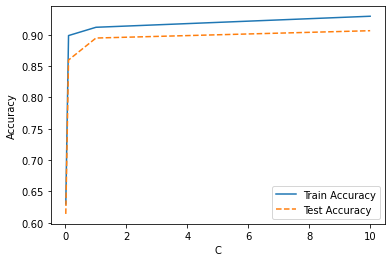

In [26]:
#C별 정확도 그래프로 확인
plt.plot(para_c,train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_c,test_accuracy,linestyle="--",label="Test Accuracy")
plt.xlabel("C"); plt.ylabel("Accuracy")
plt.legend()

#### 규제에 대한 강도 변경 변수인 C에 대한 모델 정확도는 0과 1 사이에 급격히 증가한다. 테이블과 그래프를 바탕으로 C의 값을 0.1로 결정한다. 

### 2-3 SVC 모델 Parameter 변경 - Gamma규제에 대한 강도 변경 결과

In [30]:
#train 및 test 정확도 결과 저장용
train_accuracy =[]; test_accuracy=[]

#lc; 규제 (0.01,0.1,1,10)
para_gamma=[10**gamma for gamma in range(-2,3)]

for v_gamma in para_gamma:
    svm=SVC(gamma=v_gamma,C=0.1 ,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))
    
#데이터 테이블로 저장 
df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma["gamma"]=para_gamma
df_accuracy_gamma["TrainAccuracy"]=train_accuracy
df_accuracy_gamma["TestAccuracy"]=test_accuracy

#C별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.630,0.614
1,0.10,0.899,0.860
2,1.00,0.912,0.895
3,10.00,0.930,0.906


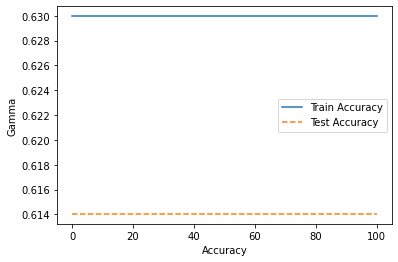

In [31]:
#Gamma별 정확도 그래프로 확인
plt.plot(para_gamma,train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_gamma,test_accuracy,linestyle="--",label="Test Accuracy")
plt.xlabel("Accuracy"); plt.ylabel("Gamma")
plt.legend()

# 3. Scale 조정 

#### 훈련 샘플이 미치는 영향 범위 변수인 Gamma에 관한 모델 정확도는 0.01~100까지 일정하므로 gamma는 모델 정확도에 큰 영향을 미치지 않는 것으로 판단한다. 

### 3-1 Scale 변환 - 설명 변수 값의 구산을 동일하게 변경

In [34]:
# 변수명 저장 
v_feature_name = df_train_x.columns

# StandardScaler 적용 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [38]:
# 데이터 분할
df_scaled_train_x,df_scaled_test_x=train_test_split(df_scaled,test_size=0.3,\
                                                    random_state=1234)
df_scaled_train_x,df_scaled_val_x=train_test_split(df_scaled_train_x,test_size=3/7,random_state=1234)
print('train data X size:{}'.format(df_train_x.shape))
print('validation data X size:{}'.format(df_val_x.shape))
print('test data X size:{}'.format(df_test_x.shape))

train data X size:(227, 30)
validation data X size:(171, 30)
test data X size:(171, 30)


### 3-2 Scale 변환 - scale 조절 후 SVC 모델 재시행

In [39]:
svm_scaled = SVC(random_state = 1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)

# train 데이터 셋 정확도
print("Accuracy on training set:{:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))

# test 데이터 셋 정확도
print("Accuracy on test set:{:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set:0.996
Accuracy on test set:0.936


#### 스케일 변경 후 모델 정확도는 train 99.6%, test 93.6%로 향상되었다.  변경된 모델의 정확도를 보다 향상하기 위해 scale한 변수에서 hyperparameter를 변경해본다. 

### 3-3 Scale 변환 - scale 조절 후 C 규제에 대한 강도 변화

In [46]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# c: 규제(0.01, 0..1, 1, 10)
para_c = [10 ** (0.2*c) for c in range(-10,5)]
for v_C in para_c:
    svm = SVC(C=v_C, random_state=1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

#C별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.010,0.630,0.614
1,0.016,0.630,0.614
2,0.025,0.696,0.696
3,0.040,0.934,0.865
4,0.063,0.974,0.895
5,0.100,0.974,0.895
6,0.158,0.974,0.906
7,0.251,0.978,0.906
8,0.398,0.982,0.918
9,0.631,0.996,0.936


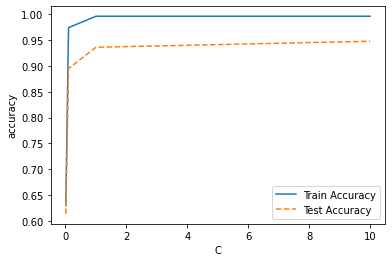

In [41]:
# C별 정확도 테이블
df_accuracy_c.round(3)
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

#### scale 변환 후,Train의 정확도와 train/test 데이터의 성능변화를 고려하여 C를 2.5로 결정한다. 

### 3-4 Scale 변환 - scale 조절 후 C 규제에 대한 강도 변화

In [59]:
#train 및 test정확도 결과 저장용
train_accuracy=[];test_accuracy=[]

#gamma: 규제(0.01 , 0.1 , 1, 10)
para_gamma=[10 **(0.2*gamma) for gamma in range(-10,1)]
for v_gamma in para_gamma:
    svm=SVC(gamma=v_gamma,C=2.5,random_state=1234)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x,df_test_y))
    
#데이터 테이블로 저장
df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma['gamma']=para_gamma
df_accuracy_gamma['TrainAccuracy']=train_accuracy
df_accuracy_gamma['TestAccuracy']=test_accuracy

#Gamma별 정확도 테이블
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.010,0.996,0.930
1,0.016,0.996,0.947
2,0.025,0.996,0.947
3,0.040,0.996,0.953
4,0.063,0.996,0.942
5,0.100,0.996,0.930
6,0.158,0.996,0.930
7,0.251,1.000,0.912
8,0.398,1.000,0.795
9,0.631,1.000,0.667


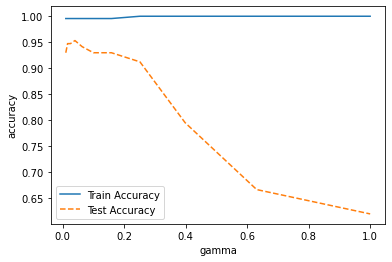

In [60]:
# Gamma 별 정확도 그래프로 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = 'Train Accuracy')
plt.plot(para_gamma, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('gamma')
plt.legend()

In [64]:
# Gamma의 정확도를 위해 한번 더 시행 

#train 및 test정확도 결과 저장용
train_accuracy_1=[];test_accuracy_1=[]

#gamma: 규제(0.01 , 0.1 , 1, 10)
para_gamma_1=[10 **(0.1*gamma) for gamma in range(-20,1)]
for v_gamma in para_gamma_1:
    svm=SVC(gamma=v_gamma,C=2.5,random_state=1234)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy_1.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy_1.append(svm.score(df_scaled_test_x,df_test_y))
    
#데이터 테이블로 저장
df_accuracy_gamma_1=pd.DataFrame()
df_accuracy_gamma_1['gamma']=para_gamma_1
df_accuracy_gamma_1['TrainAccuracy']=train_accuracy_1
df_accuracy_gamma_1['TestAccuracy']=test_accuracy_1

#Gamma별 정확도 테이블
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.010,0.996,0.930
1,0.016,0.996,0.947
2,0.025,0.996,0.947
3,0.040,0.996,0.953
4,0.063,0.996,0.942
5,0.100,0.996,0.930
6,0.158,0.996,0.930
7,0.251,1.000,0.912
8,0.398,1.000,0.795
9,0.631,1.000,0.667


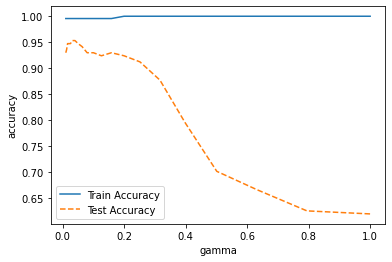

In [66]:
# Gamma 별 정확도 그래프로 확인
plt.plot(para_gamma_1, train_accuracy_1, linestyle = "-", label = 'Train Accuracy')
plt.plot(para_gamma_1, test_accuracy_1, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('gamma')
plt.legend()

#### scale 변환 후,Train의 정확도와 train/test 데이터의 성능변화를 고려하여 Gamma를 0.04로 결정한다. 

# 4. 결론 도출

In [69]:
# 최종모델 
svc_final = SVC(gamma = 0.04, C = 2.5, random_state = 1234)
svc_final.fit(df_scaled_train_x, df_train_y)

# 평가
y_pred = svc_final.predict(df_scaled_test_x)

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}" .format(svc_final.score(df_scaled_train_x, df_train_y)))

# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f} \n" .format(svc_final.score(df_scaled_test_x, df_test_y)))

# confusion matrix
print("Confusion matrix: \n {}" .format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.996
Accuracy on test set: 0.953 

Confusion matrix: 
 [[103   2]
 [  6  60]]


#### 최종적으로 모델 정확도는 train 99.6%, 95.3%로 최초 모델에 비해 train은 약 8.4%, test는 약 5.8% 상승하였다. 
#### 반면, confusion matrix를 확인하였을 때 악성(0)을 양성(1)로 판단할 확률이 약 1.94%이다. 악성 오진은 환자에게 심각한 영향을 미칠 수 있으므로 모델을 더 개선할 필요가 있을 것이다. 

# * GridSearchCV를 이용한 최적 parameter 찾기 

In [70]:
# 모듈 추가 : 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [72]:
estimator=SVC(random_state=1234)

# 구하고자 하는 parameter와 범위
param_grid={"C":para_c, "gamma":para_gamma}

# 설명력이 높은 최적 parameter 찾기
grid_rf=GridSearchCV(estimator,param_grid,scoring='accuracy',n_jobs=-1)
grid_rf.fit(df_scaled_train_x, df_train_y)

print('best estimator model:\n{}'.format(grid_rf.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_rf.best_params_))
print('\nbest score:\n{}'.format(grid_rf.best_score_.round(3)))

best estimator model:
SVC(C=3.981071705534973, gamma=0.025118864315095794, random_state=1234)

best parameter:
{'C': 3.981071705534973, 'gamma': 0.025118864315095794}

best score:
0.996


#### GridSearchCV를 활용하였을 때, C가 3.98, gamma가 0.025를 최적의 파라미터로 지정하고 있다. 
#### 결과를 확인하기 위해 모델에 적용해본다.

In [73]:
# 최종모델 
svc_final = SVC(gamma = 0.025, C = 3.98, random_state = 1234)
svc_final.fit(df_scaled_train_x, df_train_y)

# 평가
y_pred = svc_final.predict(df_scaled_test_x)

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}" .format(svc_final.score(df_scaled_train_x, df_train_y)))

# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f} \n" .format(svc_final.score(df_scaled_test_x, df_test_y)))

# confusion matrix
print("Confusion matrix: \n {}" .format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.996
Accuracy on test set: 0.947 

Confusion matrix: 
 [[102   3]
 [  6  60]]


#### GridSearchCV 사용 결과, 모델 정확도는 train 99.6%, 94.7%로 기존모델보다 정확도가 낮은 것으로 판단할 수 있다. 또한 confusion matrix를 확인하였을 때, 악성을 양성을 판단할 확률은 2.94%로 기존의 모델을 채택하도록 한다.  